# WINE SEGMENTATION

perform statistical analysis on the clusters highlighting key findings and making recommendations on business decisions based on your findings

In [1]:
## Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings.filterwarnings('ignore')
sns.set()
#from pandas_profiling import ProfileReport

## Data Importation

In [2]:

wine_data = pd.read_csv('alcohols.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
wine_data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


## Data Cleaning

Dealing with ourliers

In [5]:
column_list =  wine_data.columns.tolist()

In [6]:
column_list

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

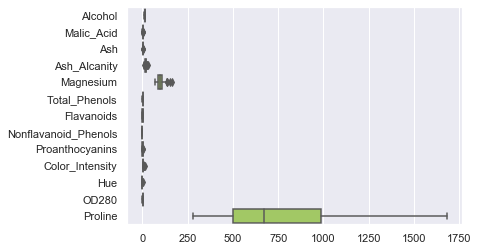

In [7]:
ax = sns.boxplot(data = wine_data ,orient = "h", palette = "Set2")

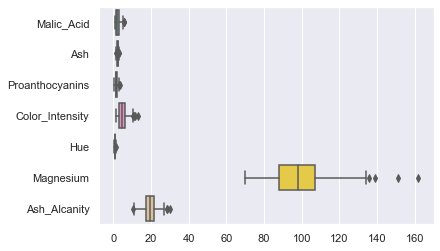

In [8]:
ax = sns.boxplot(data=wine_data[['Malic_Acid','Ash','Proanthocyanins','Color_Intensity', 'Hue','Magnesium', 'Ash_Alcanity']], orient="h", palette="Set2")

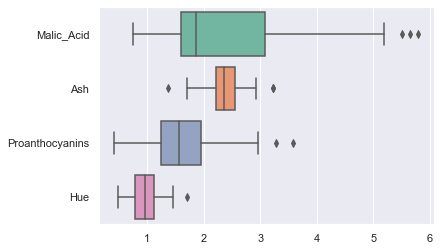

In [9]:
ax = sns.boxplot(data=wine_data[[
            'Malic_Acid',
            'Ash',
            'Proanthocyanins',
            'Hue',]]
         ,orient="h", palette="Set2")

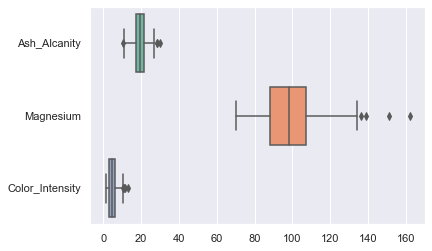

In [10]:
ax = sns.boxplot(data=wine_data[[
             'Ash_Alcanity',
             'Magnesium',
             'Color_Intensity']]
            , orient="h", palette="Set2")

In [11]:
#Run twice
for i in ['Proanthocyanins', 'Hue','Magnesium']:
    q1 = np.percentile(wine_data[i],25)
    q3 = np.percentile(wine_data[i],75)

    iqr = q3-q1
    min_amount = q1 - 1.5*iqr
    max_amount = q3 + 1.5*iqr

    wine_data[i][wine_data[i]>max_amount]=wine_data[i].median()
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
for i in ['Ash','Ash_Alcanity']:
    q1 = np.percentile(wine_data[i],25)
    q3 = np.percentile(wine_data[i],75)

    iqr = q3-q1
    min_amount = q1 - 1.5*iqr
    max_amount = q3 + 1.5*iqr

    wine_data[i][wine_data[i]>max_amount]=wine_data[i].median()
    wine_data[i][wine_data[i]<min_amount]=wine_data[i].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


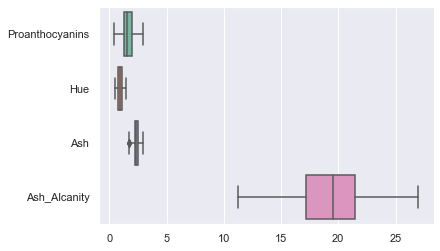

In [13]:
ax = sns.boxplot(data=wine_data[['Proanthocyanins', 'Hue','Ash','Ash_Alcanity']]
            , orient="h", palette="Set2")

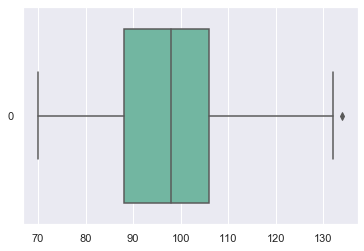

In [14]:
ax = sns.boxplot(data=wine_data['Magnesium']
            , orient="h", palette="Set2")

In [15]:
#Run 5 times
q1 = np.percentile(wine_data['Color_Intensity'],25)
q3 = np.percentile(wine_data['Color_Intensity'],75)

iqr = q3-q1
min_amount = q1 - 1.5*iqr
max_amount = q3 + 1.5*iqr

wine_data['Color_Intensity'][wine_data['Color_Intensity']>max_amount]=wine_data['Color_Intensity'].median()
wine_data['Color_Intensity'][wine_data['Color_Intensity']<min_amount]=wine_data['Color_Intensity'].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


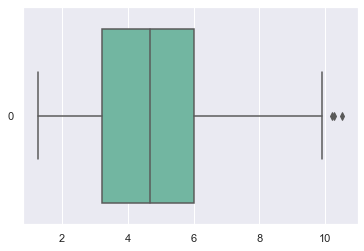

In [16]:
ax = sns.boxplot(data=wine_data['Color_Intensity']
            , orient="h", palette="Set2")

In [17]:
q1 = np.percentile(wine_data['Malic_Acid'],25)
q3 = np.percentile(wine_data['Malic_Acid'],75)

iqr = q3-q1
min_amount = q1 - 1.5*iqr
max_amount = q3 + 1.5*iqr

wine_data['Malic_Acid'][wine_data['Malic_Acid']>max_amount]=wine_data['Malic_Acid'].median()
wine_data['Malic_Acid'][wine_data['Malic_Acid']<min_amount]=wine_data['Malic_Acid'].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


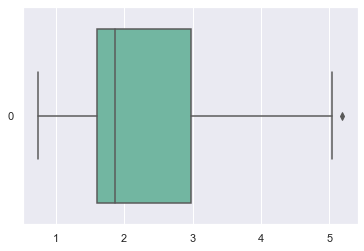

In [18]:
ax = sns.boxplot(data=wine_data['Malic_Acid']
            , orient="h", palette="Set2")

## Data Preparation

In [19]:
# standardize the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
winedata_std = sc.fit_transform(wine_data)

## Clustering the Dataset

We will use the elbow method to find the number of clusters we will use for segmentation

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 60, init = 'k-means++')
    kmeans.fit(winedata_std)
    wcss.append(kmeans.inertia_)


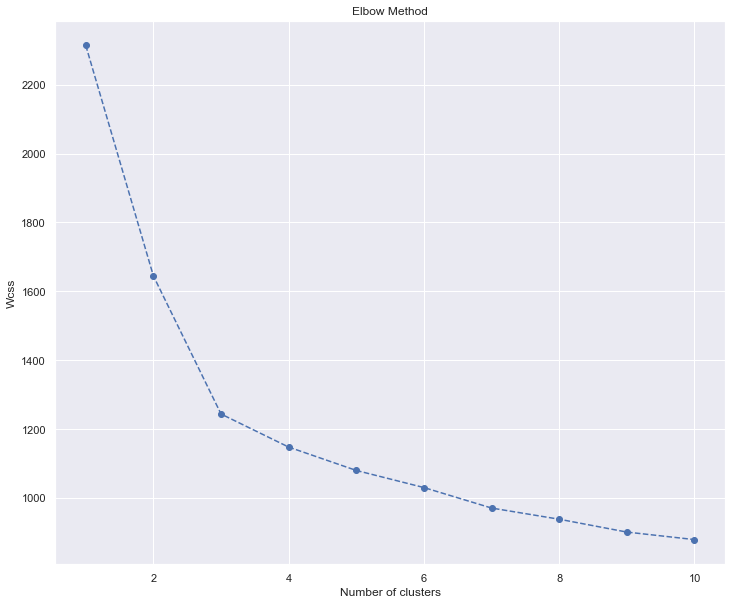

In [21]:
plt.figure(figsize= (12,10))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.title('Elbow Method')
plt.show()


## Hierachical Clustering

the optimal number of clusters is 3 using the elbow method

## Finding the number of clusters using the dendrogram method

Euclidean Distance..straight line between points

Manhattan distance...change in x and change in y between points

Maximum distance...horizontal, change in x

To divide the clusters, we need to find a horizontal line on the dendogram on which to cut

Rule of thumb:Find the longest vertical line unintercepted by a horizontal line from the dendogram so as to make the cut

Use Hierarchical clustering to determine the number of clusters and flat clustering for segmentation

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
hier_clust= linkage(winedata_std, method = 'ward')

plt.figure(figsize=(12,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p=5,
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

Through the above method, I determine the optimum number of clusters to be 3 since the longest line is between 30 and 15 and touches the 3rd level

## Data Modelling

In [154]:
## fitting our standardized dataset into the model
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = np.random)
kmeans.fit(winedata_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=<module 'numpy.random' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
       tol=0.0001, verbose=0)

In [155]:
df_seg_kmeans = wine_data.copy()
df_seg_kmeans['segment k-means'] = kmeans.labels_

In [156]:
df_seg_analysis = df_seg_kmeans.groupby(['segment k-means']). mean()
df_seg_analysis

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
segment k-means,,,,,,,,,,,,,
0,13.134118,3.161569,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,6.696078,0.691961,1.696667,619.058824
1,12.254242,1.832045,2.245909,20.045455,91.439394,2.251515,2.053333,0.357121,1.592424,2.967424,1.052894,2.800758,516.636364
2,13.696557,2.005738,2.442295,17.118033,106.409836,2.853279,3.015246,0.291639,1.899836,5.500328,1.063934,3.172131,1102.901639


## Model Evaluation

### Findings

Segment 1: Highest in Alcohol, Ash, Magnesium, Total_Phenols, Flavanoids, Proanthocyanins, Hue, OD280 and proline
Segment 2: Highest in Malic_Acid, Ash_Alcanity, Nonflavanoid_Phenols, Color_Intensity
Segment 3: 2nd in Hue and 0D280

Segment 1: Best_Quality
Segment 2: Standard_n_Colored
Segment 3: Sub-standard

In [157]:
df_seg_analysis['N Obs'] = df_seg_kmeans[['segment k-means','Alcohol']].groupby(['segment k-means']).count()
#in order to count each column in a row, a second argument is required

In [158]:
df_seg_analysis['Prop Obs'] = df_seg_analysis['N Obs']/df_seg_analysis['N Obs'].sum()
df_seg_analysis
#Proportions

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,N Obs,Prop Obs
segment k-means,,,,,,,,,,,,,,,
0,13.134118,3.161569,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,6.696078,0.691961,1.696667,619.058824,51,0.286517
1,12.254242,1.832045,2.245909,20.045455,91.439394,2.251515,2.053333,0.357121,1.592424,2.967424,1.052894,2.800758,516.636364,66,0.370787
2,13.696557,2.005738,2.442295,17.118033,106.409836,2.853279,3.015246,0.291639,1.899836,5.500328,1.063934,3.172131,1102.901639,61,0.342697


In [159]:
df_seg_kmeans[:][df_seg_kmeans['segment k-means']==0]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,segment k-means
61,12.64,1.360,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450,0
83,13.05,3.860,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,0
118,12.77,3.430,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372,0
130,12.86,1.350,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,0
131,12.88,2.990,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,0
132,12.81,2.310,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,0
133,12.70,3.550,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,0
134,12.51,1.240,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,0
135,12.60,2.460,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,0
136,12.25,4.720,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,0


In [160]:
df_seg_kmeans[:][df_seg_kmeans['segment k-means']==1]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,segment k-means
59,12.37,0.940,2.36,19.5,88,1.98,0.57,0.28,0.420,1.95,1.050,1.82,520,1
60,12.33,1.100,2.28,16.0,101,2.05,1.09,0.63,0.410,3.27,1.250,1.67,680,1
62,13.67,1.250,1.92,18.0,94,2.10,1.79,0.32,0.730,3.80,1.230,2.46,630,1
63,12.37,1.130,2.16,19.0,87,3.50,3.10,0.19,1.870,4.45,1.220,2.87,420,1
64,12.17,1.450,2.53,19.0,104,1.89,1.75,0.45,1.030,2.95,1.450,2.23,355,1
65,12.37,1.210,2.56,18.1,98,2.42,2.65,0.37,2.080,4.60,1.190,2.30,678,1
66,13.11,1.010,1.70,15.0,78,2.98,3.18,0.26,2.280,5.30,1.120,3.18,502,1
67,12.37,1.170,1.92,19.6,78,2.11,2.00,0.27,1.040,4.68,1.120,3.48,510,1
68,13.34,0.940,2.36,17.0,110,2.53,1.30,0.55,0.420,3.17,1.020,1.93,750,1
69,12.21,1.190,1.75,16.8,98,1.85,1.28,0.14,2.500,2.85,1.280,3.07,718,1


In [161]:
df_seg_kmeans[:][df_seg_kmeans['segment k-means']==2]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,segment k-means
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,2
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,2
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,2
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,2


In [162]:
df_seg_analysis.rename({0:'Best_Quality',
                     1:'Standard_and_Colored',
                     2:'Sub-standard'})

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,N Obs,Prop Obs
segment k-means,,,,,,,,,,,,,,,
Best_Quality,13.134118,3.161569,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,6.696078,0.691961,1.696667,619.058824,51,0.286517
Standard_and_Colored,12.254242,1.832045,2.245909,20.045455,91.439394,2.251515,2.053333,0.357121,1.592424,2.967424,1.052894,2.800758,516.636364,66,0.370787
Sub-standard,13.696557,2.005738,2.442295,17.118033,106.409836,2.853279,3.015246,0.291639,1.899836,5.500328,1.063934,3.172131,1102.901639,61,0.342697


In [163]:
df_seg_kmeans['Labels'] = df_seg_kmeans['segment k-means'].map({0:'Best_Quality',
                     1:'Standard_and_Colored',
                     2:'Sub-standard'})

## Comparing Proline and Alchohol

<function matplotlib.pyplot.show(*args, **kw)>

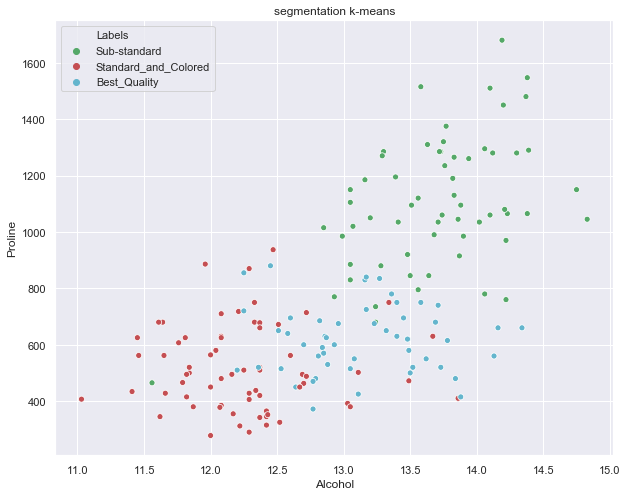

In [164]:
x_label = df_seg_kmeans['Alcohol']
y_label = df_seg_kmeans['Proline']
plt.figure(figsize = (10,8))
sns.scatterplot(x_label, y_label, hue = df_seg_kmeans['Labels'], palette =['g','r','c'])
plt.title('segmentation k-means')
plt.show

# DIMENSIONALITY REDUCTION

## Using Principal Component Analysis

reducing the number of independent variables

In [172]:
from sklearn.decomposition import PCA
pca = PCA(random_state = np.random)
pca.fit(winedata_std)

PCA(copy=True, iterated_power='auto', n_components=None,
    random_state=<module 'numpy.random' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
    svd_solver='auto', tol=0.0, whiten=False)

In [173]:
pca.explained_variance_ratio_

array([0.37086336, 0.20332931, 0.0954301 , 0.0694187 , 0.06023354,
       0.04419032, 0.03910542, 0.02895931, 0.02478652, 0.02137276,
       0.01903084, 0.01554002, 0.00773979])

Find a subset of components while reserving variance/Information

Keep 80% of variance

Text(0, 0.5, 'Cumulative Explained Variance')

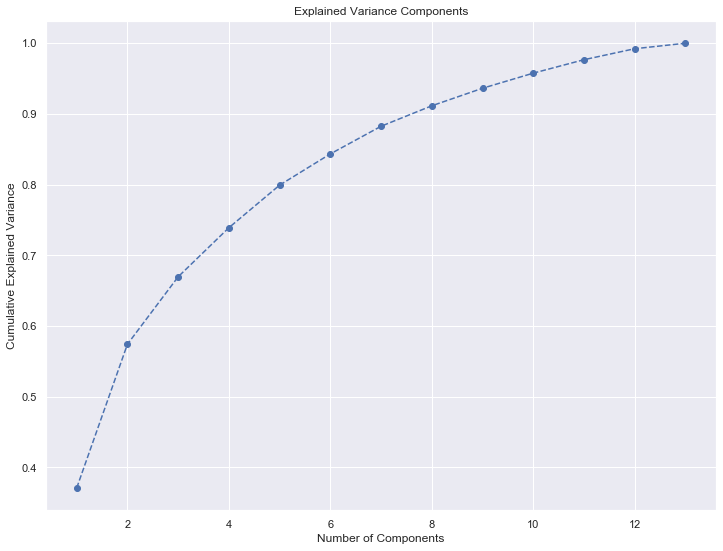

In [174]:
plt.figure(figsize = (12,9))
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle ='--')
plt.title('Explained Variance Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

From above, we choose 5 components since at x=5, variance is roughly 80%

In [175]:
pca = PCA(n_components =5, random_state = np.random)
pca.fit(winedata_std)

PCA(copy=True, iterated_power='auto', n_components=5,
    random_state=<module 'numpy.random' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
    svd_solver='auto', tol=0.0, whiten=False)

In [176]:
pca.components_

array([[ 0.15843193, -0.22949146, -0.00900944, -0.28184217,  0.12804436,
         0.39166918,  0.42149646, -0.28918228,  0.31811799, -0.05327639,
         0.29483535,  0.36947873,  0.29008829],
       [-0.4605688 , -0.24730811, -0.31509024,  0.03817107, -0.37576585,
        -0.03571682,  0.02510589, -0.03199428,  0.00391039, -0.51258578,
         0.25254414,  0.17726316, -0.35197492],
       [-0.15281202,  0.04325352,  0.68696786,  0.55094626,  0.1771668 ,
         0.15251558,  0.11028367,  0.14399895,  0.10486423, -0.24140296,
         0.10878308,  0.1509669 , -0.08869653],
       [-0.05291463,  0.56164356, -0.17780202,  0.14569654, -0.19119538,
         0.17761175,  0.15204262, -0.22795429,  0.43341081,  0.05437804,
        -0.451599  ,  0.18597017, -0.23749806],
       [-0.21657107,  0.08838287, -0.05992484, -0.0050366 ,  0.61489746,
        -0.11477611, -0.0457467 , -0.63643691, -0.30447061, -0.16219391,
        -0.07892118,  0.0118019 , -0.13369702]])

In [177]:
df_pca_comp =pd.DataFrame (data = pca.components_ ,
              columns = wine_data.columns.values, 
              index =['component_1', 'component_2', 'component_3', 'component_4','component_5'])
df_pca_comp

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
component_1,0.158432,-0.229491,-0.009009,-0.281842,0.128044,0.391669,0.421496,-0.289182,0.318118,-0.053276,0.294835,0.369479,0.290088
component_2,-0.460569,-0.247308,-0.315090,0.038171,-0.375766,-0.035717,0.025106,-0.031994,0.003910,-0.512586,0.252544,0.177263,-0.351975
component_3,-0.152812,0.043254,0.686968,0.550946,0.177167,0.152516,0.110284,0.143999,0.104864,-0.241403,0.108783,0.150967,-0.088697
component_4,-0.052915,0.561644,-0.177802,0.145697,-0.191195,0.177612,0.152043,-0.227954,0.433411,0.054378,-0.451599,0.185970,-0.237498
component_5,-0.216571,0.088383,-0.059925,-0.005037,0.614897,-0.114776,-0.045747,-0.636437,-0.304471,-0.162194,-0.078921,0.011802,-0.133697


Component 1: (Highest) Magnesium, Total Phenols, Flavanoids, Hue, OD280	, Proline, Proanthocyanins, Alcohol

             (Lowest) Malic Acid, Ash Alcanity
             
Component 2: (Highest) Hue, OD280

             (Lowest) Alcohol, Total Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Proline
             
Component 3: (Highest) Ash, Ash Alcanity

             (Lowest) Color_intensity, Alcohol
             
Component 4: (Highest) Malic Acid, Proanthocyanins

             (Lowest) Ash, Hue
             
Component 5: (Lowest) Alcohol,Nonflavanoid_Phenols, Color_Intensity

             (Highest) Magnesium, OD280

### Heat Map

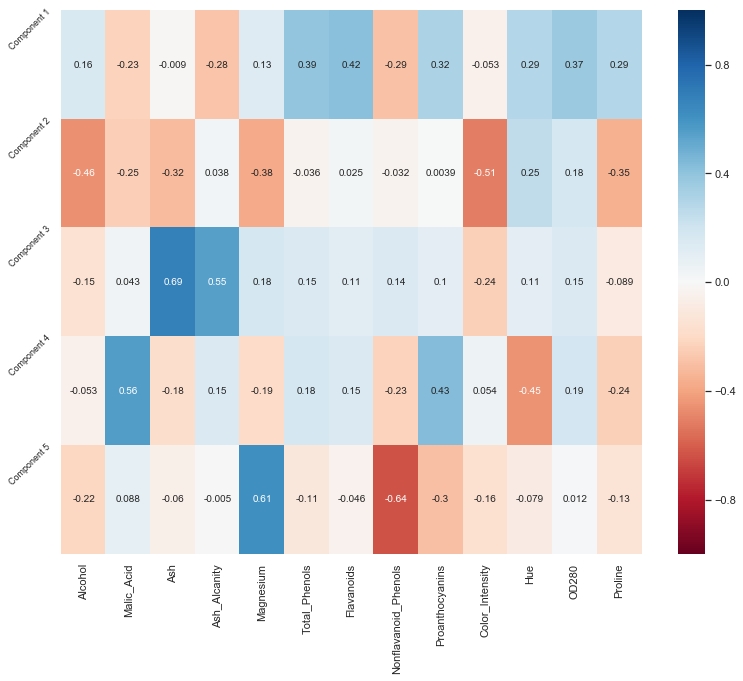

In [178]:
plt.figure(figsize=(13,10))
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot= True)
plt.yticks([0, 1, 2, 3, 4, 5],
          ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'],
          rotation = 45,
          fontsize = 9)
plt.show()

In [179]:
pca.transform(winedata_std)

array([[ 3.45975652e+00, -1.65805294e+00,  8.29185743e-02,
        -8.46644863e-02,  7.09117324e-01],
       [ 2.36719025e+00,  2.63030608e-01, -1.96924322e+00,
        -6.07070831e-01,  5.18867154e-01],
       [ 2.58686655e+00, -1.01470896e+00,  1.09278357e+00,
         8.64789399e-01, -7.90686116e-01],
       [ 3.88348904e+00, -2.79793226e+00, -4.21663759e-02,
         6.00177712e-01, -2.64936043e-01],
       [ 9.74746122e-01, -1.11831298e+00,  2.41719389e+00,
        -1.37792775e-01,  4.27156582e-01],
       [ 3.20914236e+00, -2.21908370e+00, -4.46283376e-01,
        -6.02937740e-01, -5.37107545e-01],
       [ 2.58917154e+00, -1.14013894e+00, -7.88581270e-01,
        -2.69013432e-01, -7.94526498e-01],
       [ 2.10300546e+00, -1.88012548e+00,  5.75109971e-01,
        -1.12896636e+00,  8.77573844e-01],
       [ 2.68377199e+00, -8.46056666e-01, -1.69459914e+00,
        -2.22867946e-01, -7.63088454e-01],
       [ 2.86982480e+00, -7.47469507e-01, -1.02824826e+00,
         1.71081602e-01

In [180]:
scores_pca = pca.transform(winedata_std)

## K-MEANS CLUSTERING USING PCA

In [181]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = np.random)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)

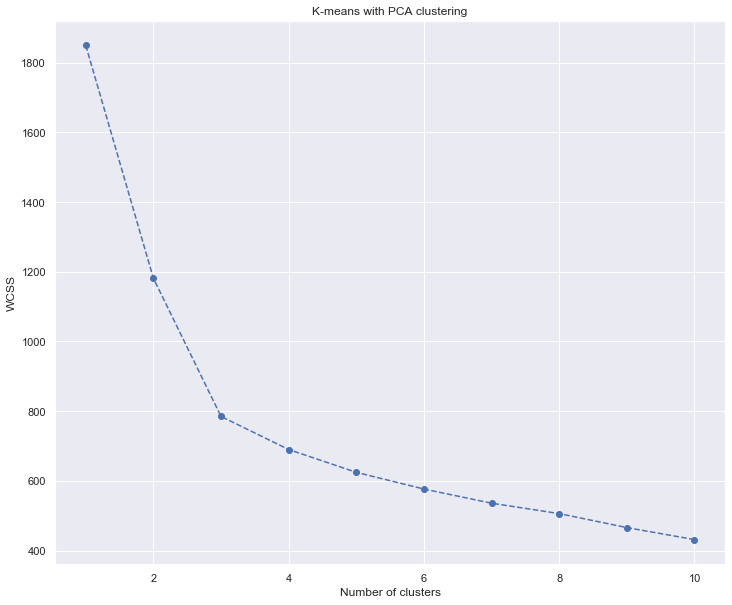

In [182]:
plt.figure(figsize =(12,10))
plt.plot(range(1,11),wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering')
plt.show()

Number of optimal clusters from the above again is 3

In [183]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = np.random)


In [184]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=<module 'numpy.random' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
       tol=0.0001, verbose=0)

In [185]:
df_segm_pca_kmeans = pd.concat([wine_data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [186]:
df_segm_pca_kmeans


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Component 1,Component 2,Component 3,Component 4,Component 5,Segment K-means PCA
0,14.23,1.710,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,3.459757,-1.658053,0.082919,-0.084664,0.709117,1
1,13.20,1.780,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,2.367190,0.263031,-1.969243,-0.607071,0.518867,1
2,13.16,2.360,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,2.586867,-1.014709,1.092784,0.864789,-0.790686,1
3,14.37,1.950,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,3.883489,-2.797932,-0.042166,0.600178,-0.264936,1
4,13.24,2.590,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,0.974746,-1.118313,2.417194,-0.137793,0.427157,1
5,14.20,1.760,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,3.209142,-2.219084,-0.446283,-0.602938,-0.537108,1
6,14.39,1.870,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,2.589172,-1.140139,-0.788581,-0.269013,-0.794526,1
7,14.06,2.150,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,2.103005,-1.880125,0.575110,-1.128966,0.877574,1
8,14.83,1.640,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,2.683772,-0.846057,-1.694599,-0.222868,-0.763088,1
9,13.86,1.350,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,2.869825,-0.747470,-1.028248,0.171082,-0.234191,1


In [187]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Component 1,Component 2,Component 3,Component 4,Component 5
Segment K-means PCA,,,,,,,,,,,,,,,,,,
0,13.134118,3.161569,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,6.696078,0.691961,1.696667,619.058824,-2.695439,-1.184671,-0.251463,0.097165,-0.034320
1,13.696557,2.005738,2.442295,17.118033,106.409836,2.853279,3.015246,0.291639,1.899836,5.500328,1.063934,3.172131,1102.901639,2.367092,-0.966745,0.011773,-0.107618,-0.037072
2,12.254242,1.832045,2.245909,20.045455,91.439394,2.251515,2.053333,0.357121,1.592424,2.967424,1.052894,2.800758,516.636364,-0.104928,1.808934,0.183431,0.024383,0.060784


Segment 1: Highest in Malic_Acid, Color_Intensity, Hue, OD280 and proline

Segment 2: Highest in Alcohol, Ash,Magnesium, Total_Phenols, Flavanoids, Proanthocyanins, Hue, OD280, Proline

Segment 3: 

Segment 1: Best_Quality_and_rich

Segment 2: Optimal

Segment 3: Acidic_oxidising

In [188]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Alcohol']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Best_Quality_and_rich',
                         1:'Optimal',
                         2:'Acidic_oxidising'})

In [189]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Best_Quality_and_rich',
                         1:'Optimal',
                         2:'Acidic_oxidising'})

Text(0.5, 1.0, 'Clusters by PCA Components 1 and 2')

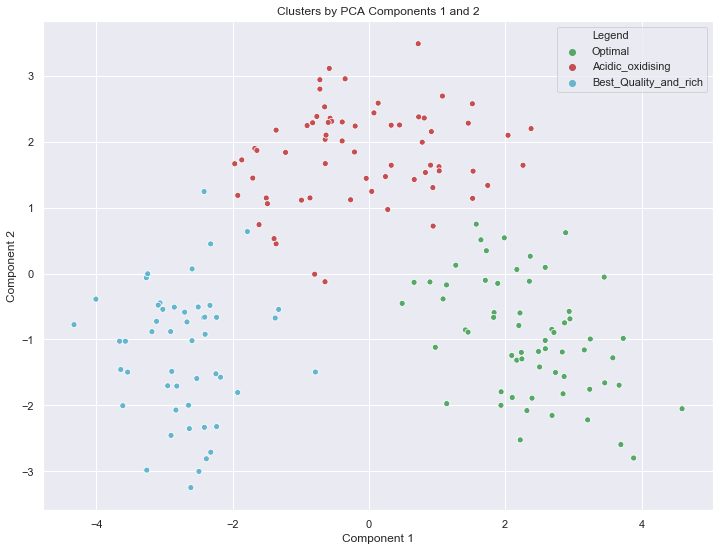

In [191]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','r','c'])
plt.title('Clusters by PCA Components 1 and 2')


Text(0.5, 1.0, 'Clusters by PCA Components 1 and 3')

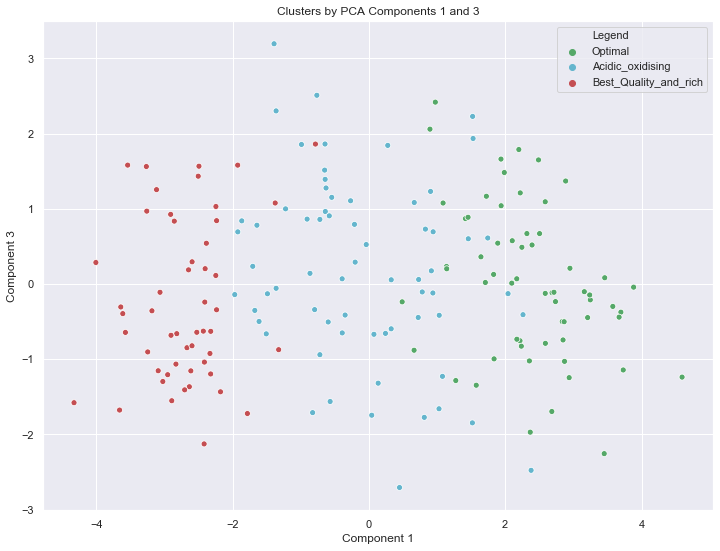

In [192]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','c','r'])
plt.title('Clusters by PCA Components 1 and 3')

Text(0.5, 1.0, 'Clusters by PCA Components 2 and 3')

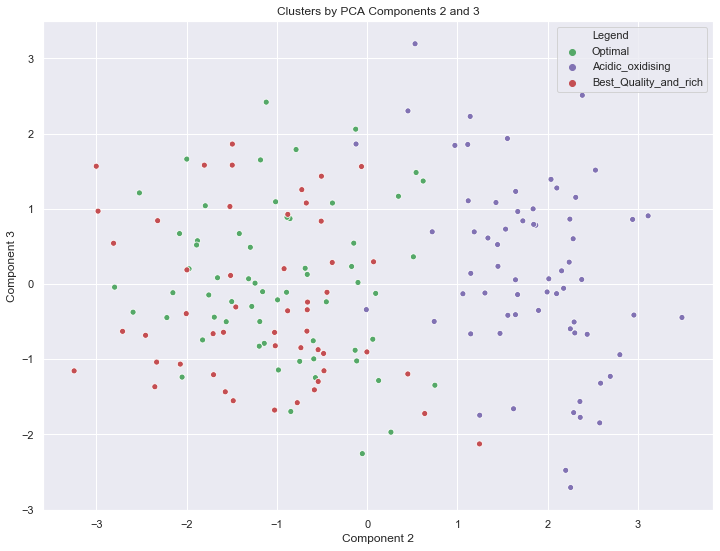

In [193]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','m','r'])
plt.title('Clusters by PCA Components 2 and 3')

#Least useful

Text(0.5, 1.0, 'Clusters by PCA Components 1 and 4')

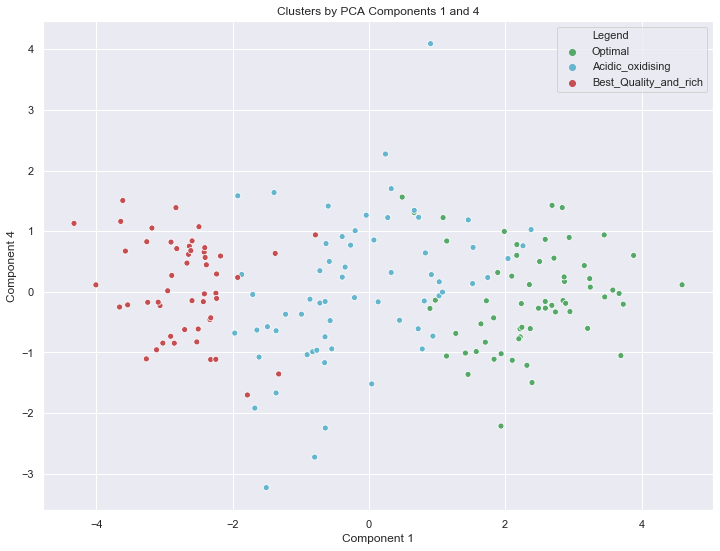

In [194]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 4']
plt.figure(figsize = (12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','c','r'])
plt.title('Clusters by PCA Components 1 and 4')

Text(0.5, 1.0, 'Clusters by PCA Components 1 and 5')

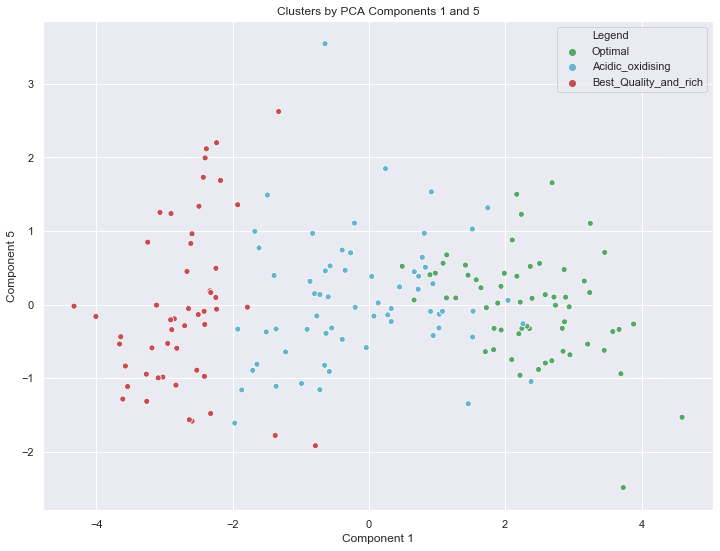

In [195]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 5']
plt.figure(figsize = (12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','c','r'])
plt.title('Clusters by PCA Components 1 and 5')

Text(0.5, 1.0, 'Clusters by PCA Components 2 and 3')

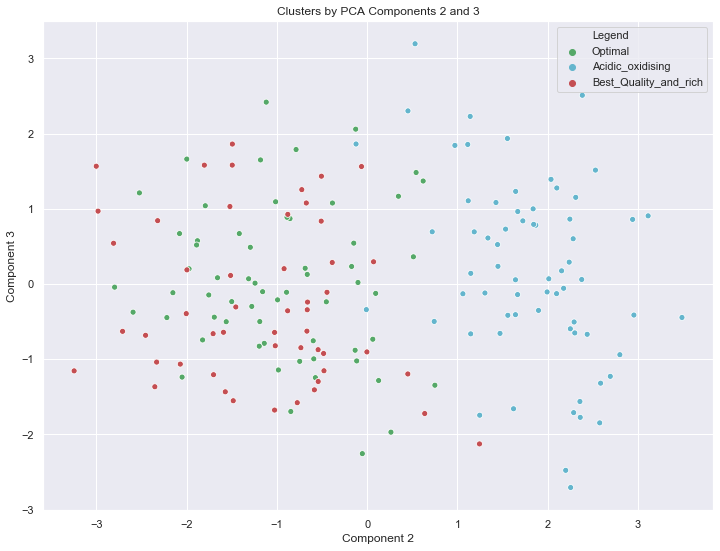

In [196]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','c','r'])
plt.title('Clusters by PCA Components 2 and 3')

Text(0.5, 1.0, 'Clusters by PCA Components 1 and 3')

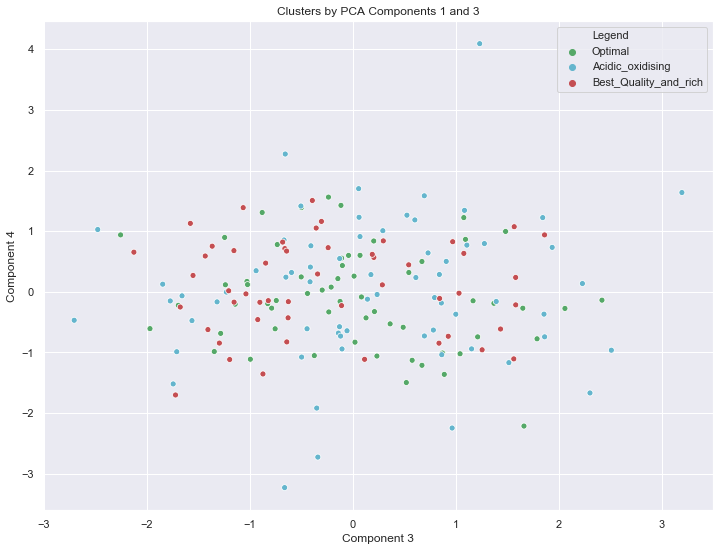

In [197]:
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 4']
plt.figure(figsize = (12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','c','r'])
plt.title('Clusters by PCA Components 1 and 3')

Text(0.5, 1.0, 'Clusters by PCA Components 4 and 5')

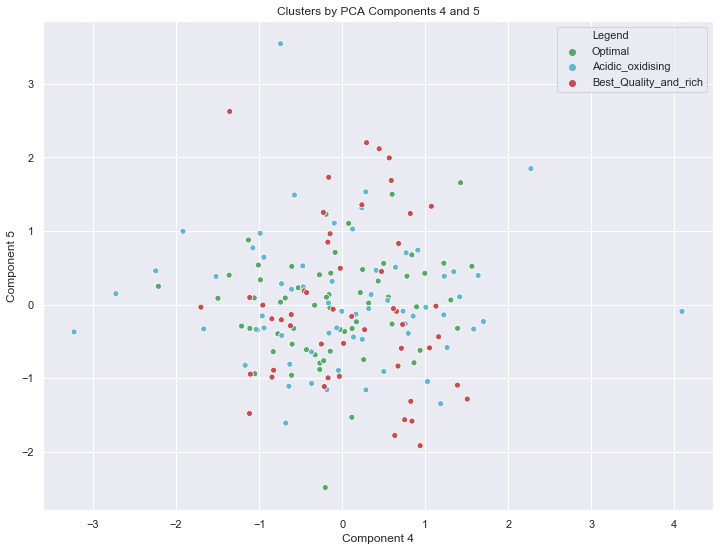

In [198]:
x_axis = df_segm_pca_kmeans['Component 4']
y_axis = df_segm_pca_kmeans['Component 5']
plt.figure(figsize = (12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','c','r'])
plt.title('Clusters by PCA Components 4 and 5')